In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('google_play_store_apps.csv')
print(df)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

In [6]:
# Display the first few rows
print(df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [7]:
# Get basic information about the dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [8]:
# Summary statistics of numerical columns
print(df.describe())

            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000


In [9]:
# Check for missing values
print(df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [25]:
# Handle missing values (e.g., filling or dropping)
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

df.dropna(subset=['App', 'Category'], inplace=True)

# Convert columns to appropriate data types
# Ensure 'Installs' is string before using .str methods
df['Installs'] = (
    df['Installs']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace('+', '', regex=False)
    .astype(int)
)


C:\Users\ramch\AppData\Local\Temp\ipykernel_16240\3424565109.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mean(), inplace=True)


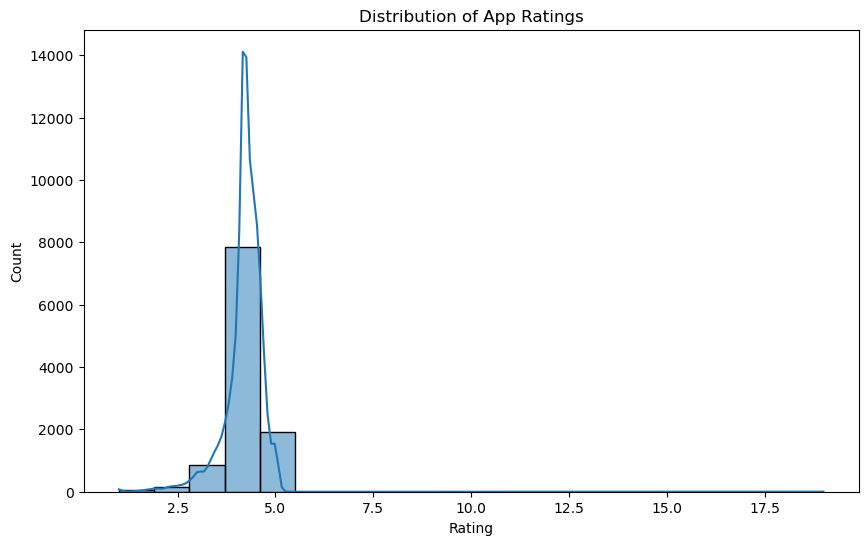

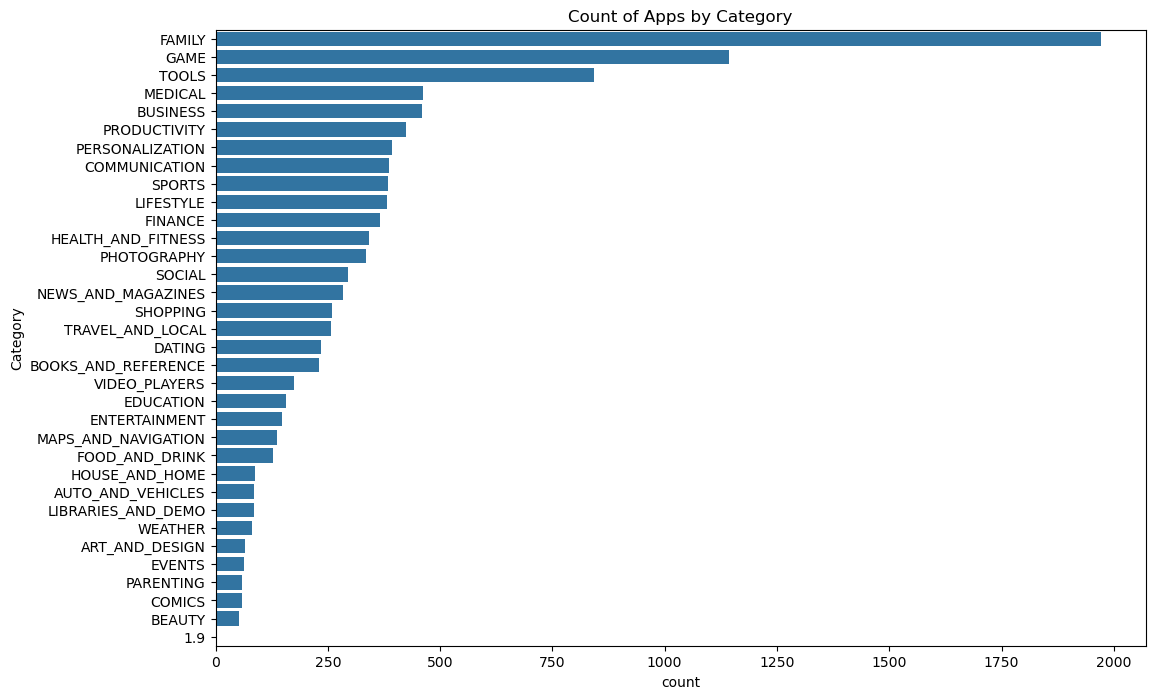

In [26]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)

plt.title('Distribution of App Ratings')
plt.show()

# Count of Apps by Category
plt.figure(figsize=(12, 8))
sns.countplot(y='Category', data=df,
order=df['Category'].value_counts().index)
plt.title('Count of Apps by Category')
plt.show()

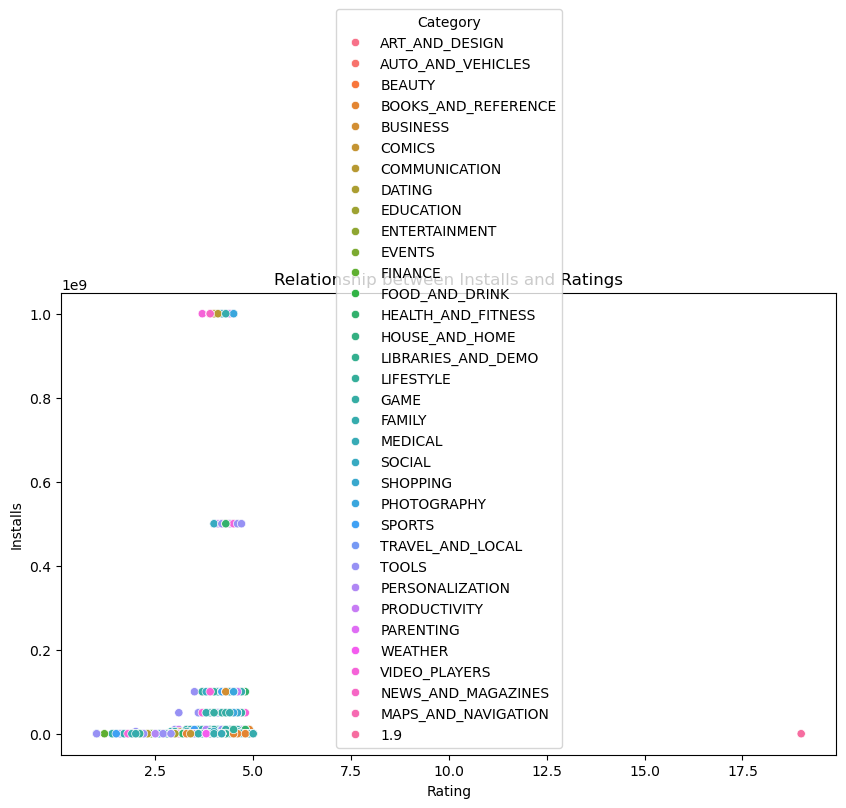

In [28]:
# Relationship between Installs and Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Installs', hue='Category',data=df)
plt.title('Relationship between Installs and Ratings')
plt.show()


In [30]:
# Average rating by category
avg_rating_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print(avg_rating_by_category)

Category
1.9                    19.000000
EDUCATION               4.387778
EVENTS                  4.363647
ART_AND_DESIGN          4.350462
BOOKS_AND_REFERENCE     4.311026
PERSONALIZATION         4.307603
GAME                    4.282506
PARENTING               4.282223
HEALTH_AND_FITNESS      4.266296
BEAUTY                  4.260882
SHOPPING                4.254052
SOCIAL                  4.248001
WEATHER                 4.239675
SPORTS                  4.218404
PRODUCTIVITY            4.208287
HOUSE_AND_HOME          4.196819
FAMILY                  4.192394
PHOTOGRAPHY             4.192179
AUTO_AND_VEHICLES       4.190824
MEDICAL                 4.190167
LIBRARIES_AND_DEMO      4.181962
FOOD_AND_DRINK          4.170709
COMMUNICATION           4.163842
COMICS                  4.156445
BUSINESS                4.145987
NEWS_AND_MAGAZINES      4.142993
FINANCE                 4.139108
ENTERTAINMENT           4.126174
TRAVEL_AND_LOCAL        4.119716
LIFESTYLE               4.112427
V

In [31]:
# Most popular apps (by installs)
most_installed_apps = df[['App','Installs']].sort_values(by='Installs',ascending=False).head(10)
print(most_installed_apps)

                                           App    Installs
5856                         Google Play Games  1000000000
5395                             Google Photos  1000000000
2853                             Google Photos  1000000000
2884                             Google Photos  1000000000
4170                              Google Drive  1000000000
4234             Skype - free IM & video calls  1000000000
4104  Messenger – Text and Video Chat for Free  1000000000
4144                                   Google+  1000000000
4150                                    Google  1000000000
4153                                  Hangouts  1000000000


In [32]:
# Top 5 genres
top_genres = df['Genres'].value_counts().head(5)

print(top_genres)

Genres
Tools            842
Entertainment    623
Education        549
Medical          463
Business         460
Name: count, dtype: int64


In [ ]:
# Conclusion
# Summarize the findings from your analysis, discussing any trends, patterns, or
# anomalies observed. For example, you might find that certain categories have higher
# average ratings or that specific genres dominate the market.

<Axes: >

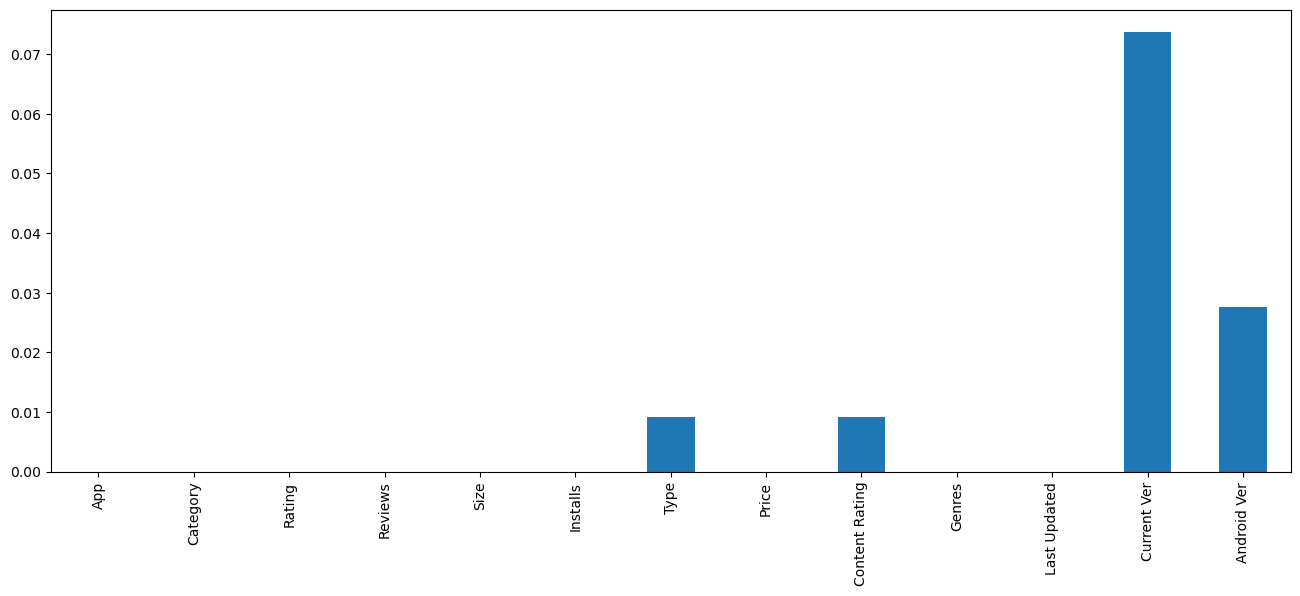

In [42]:
# make figure size
plt.figure(figsize=(16, 6))

# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels


C:\Users\ramch\AppData\Local\Temp\ipykernel_16240\446352833.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Rating'], color="blue", shade=True) # plot the distribution plot


<Axes: xlabel='Rating', ylabel='Density'>

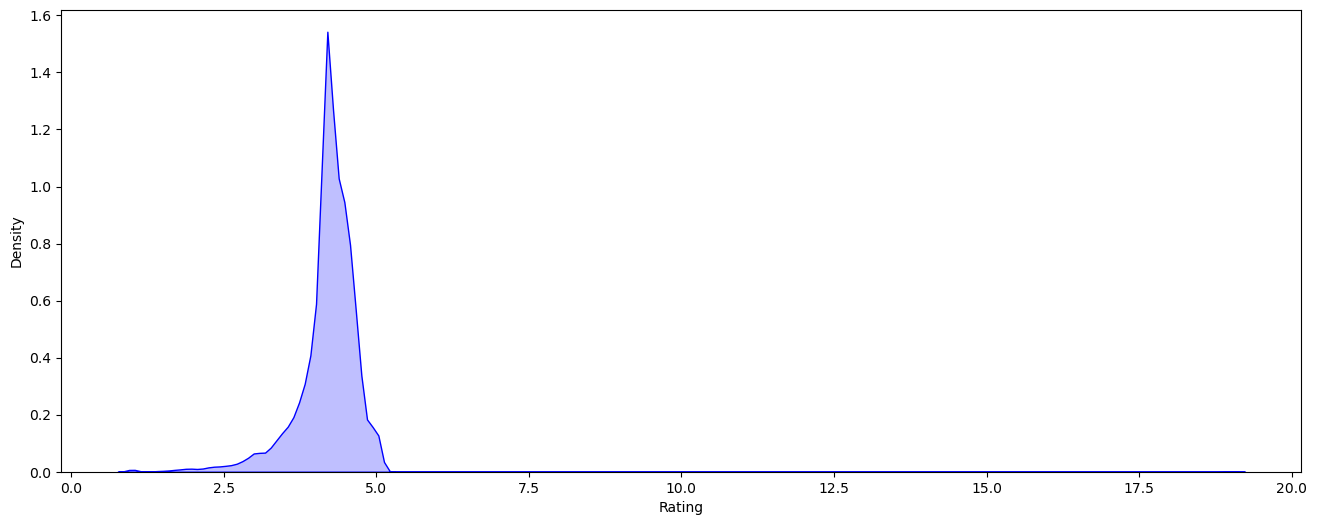

In [43]:
# plot the rating distribution
plt.figure(figsize=(16, 6)) # make figure size
sns.kdeplot(df['Rating'], color="blue", shade=True) # plot the distribution plot


In [ ]:
# Conclusion
# Summarize the findings from your analysis, discussing any trends, patterns, or
# anomalies observed. For example, you might find that certain categories have higher
# average ratings or that specific genres dominate the market.